<div style="display: flex; justify-content: center;">
    <img src="../images/Logo-personal_Fondo_blanco.png" alt="Logo_personal" /> 
</div>
<p align="center">
  <h1 align="center">Credit card fraud predictive model<h1>
  <h2 align="center">Decision tree - Random forest<h1>
</p>

---

## Introduction
This project aims to generate a binomial logistic regression model to classify, based on an examination, whether cancer is benign or malignant.

The work is carried out based on analysis, compression, data cleaning, metrics, testing and validation of the model, with the following work path:

- Development
- Understanding the data
- Data cleaning
  - Check null values
- Exploratory data analysis
  - Correlation matrix
  - Outlier detection
  - Data standardization
  - Split training, testing and validation data
- Predictive model - Decision tree 
  - Create and train the model
  - Model evaluation
  - Evaluate the model with cross validation
  - Check feature importances
  - Impact of maximum depth
- Predictive model - Random Forest 
  - Create and train the model
  - Model evaluation
  - Impact of maximum n_estimators on the model
- Demonstration of model classification
- Conclusions

## Data
The de kaggel dataset ["Credit card fraud"](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud), contains medical records whether the breast cancer is benign or malignant. The characteristics are transaction data and card records with their respective label, whether it was a fraudulent transaction or not. 

**Attribute Information:**

* distance_from_home: The distance from the home where the transaction took place.
* distance_from_last_transaction: The distance from the last transaction made.
* ratio_to_median_purchase_price: Ratio between the purchase price of the transaction and the average purchase price.
* repeat_retailer: Was the transaction at the same retailer?
* used_chip - It is the transaction through chip (credit card).
* used_pin_number: Was the transaction made using the PIN number?
* online_order: Is the transaction an online order?
* Fraud: Is the transaction fraudulent?
___

## Development
#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

print('Imported libraries')

Imported libraries


#### Import the dataset

In [2]:
df = pd.read_csv("../data/card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

#### Check null values

In [5]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

___
## Exploratory data analysis
A correlation analysis is carried out with a scatter plot and for that we use the pairplot

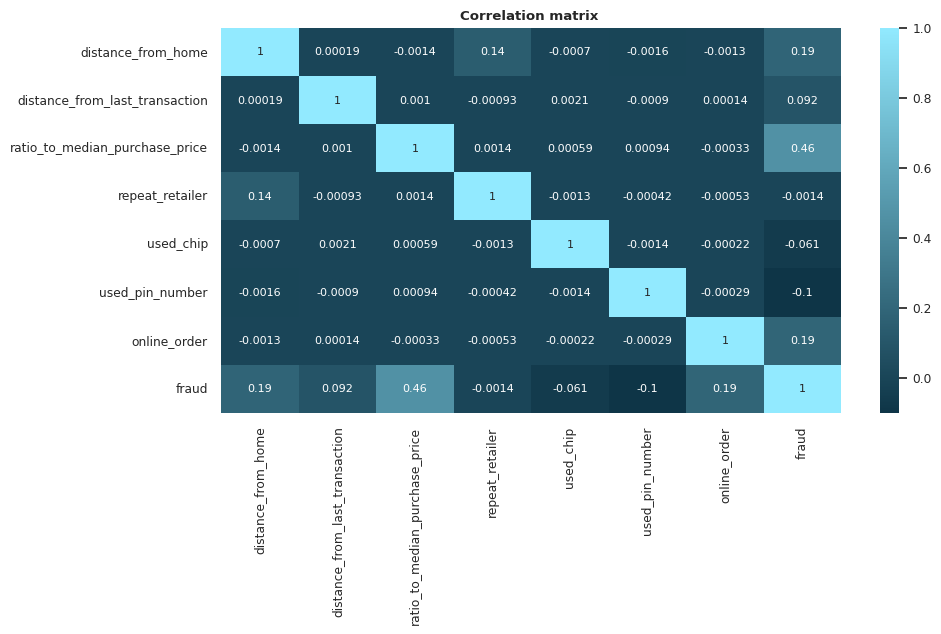

In [250]:
colors = ["#0E3547", "#92EAFF", "#6B6B6B"]
cmap = LinearSegmentedColormap.from_list('Custom', colors[:2], N=256)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid", context="notebook", font_scale=0.8)
sns.heatmap(df.corr(), cmap=cmap, annot=True, annot_kws={"size": 8})
plt.title("Correlation matrix ", fontweight='bold')
plt.show()

There is a positive correlation with respect to the objective variable "fraud" in the variables:
* ratio_to_median_purchase_price
* online_order
  
And a negative relationship with:
* used_pin_number

#### Outlier detection

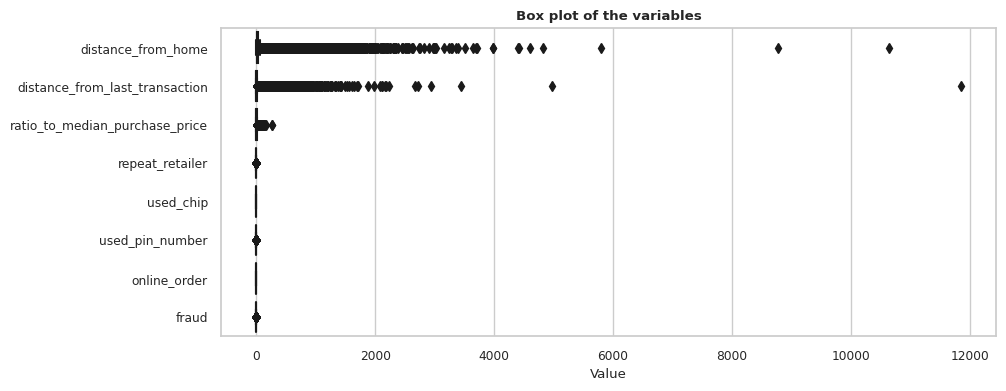

In [7]:
plt.figure(figsize=(10, 4))

sns.boxplot(data=df, orient="h", color=colors[0])  
plt.title("Box plot of the variables", fontweight='bold')
plt.xlabel("Value")
plt.show()

Visualize the greatest concentration of data in the variables with the greatest number of outliers:

In [219]:
def value_iqr(df, variable):
      q1 = round(df[variable].quantile(q = 0.25),2)
      q3 = round(df[variable].quantile(q = 0.75), 2)
      IQR = q3 - q1

      upper_limit = round(q3 + 3 * IQR , 2)      
      return upper_limit

upper_limit_distance_from_home = value_iqr(df, "distance_from_home")
upper_limit_distance_from_last_transaction = value_iqr(df, "distance_from_last_transaction")
upper_limit_ratio_to_median_purchase_price = value_iqr(df, "ratio_to_median_purchase_price")


/tmp/ipykernel_15996/3594476168.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df, x="distance_from_home", bins=1000, color=colors[0], hue="fraud", ax=ax[0], element="step", palette=colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_15996/3594476168.py:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df, x="distance_from_last_transaction", bins=1000, color=colors[0], hue="fraud", ax=ax[1], element="step", palette=colors)
/tmp/ipykernel_15996/3594476168.py:20: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df, x="ratio_to_median_purchase_price", bins=2000, color=colors[0], hue="fraud", ax=ax[2],  element="step", palette=colors)


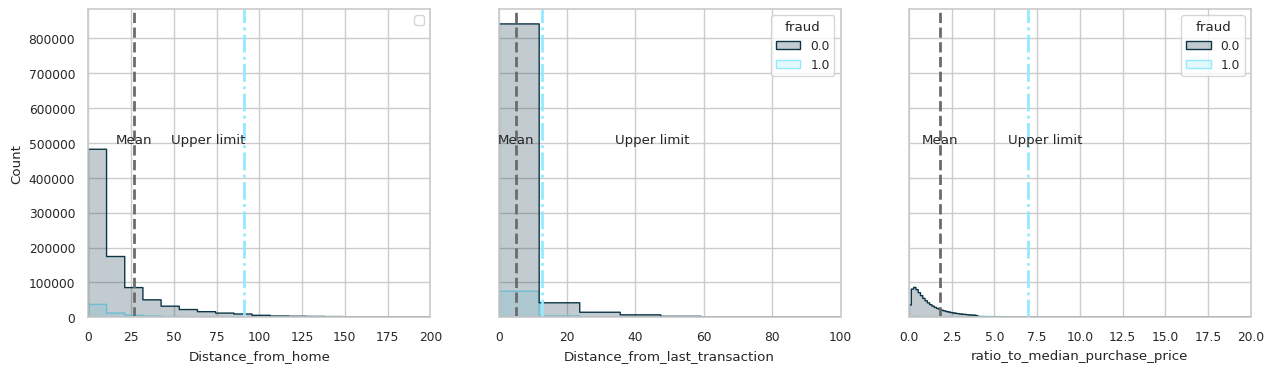

In [220]:
fig, ax = plt.subplots(1, 3, figsize=(15,4), sharey=True)
sns.histplot(data=df, x="distance_from_home", bins=1000, color=colors[0], hue="fraud", ax=ax[0], element="step", palette=colors)
ax[0].set_xlim(0, 200)
ax[0].axvline(np.mean(df["distance_from_home"]), linewidth=2, color=colors[2], linestyle='--')
ax[0].axvline(upper_limit_distance_from_home, linewidth=2, color=colors[1], linestyle='-.')
ax[0].annotate("Mean", (np.mean(df["distance_from_home"]),  500000), ha='center')
ax[0].annotate("Upper limit", (70,  500000), ha='center')
ax[0].set_xlabel("Distance_from_home")
ax[0].set_ylabel("Count")
ax[0].legend()

sns.histplot(data=df, x="distance_from_last_transaction", bins=1000, color=colors[0], hue="fraud", ax=ax[1], element="step", palette=colors)
ax[1].set_xlabel("Distance_from_last_transaction")
ax[1].set_xlim(0, 100)
ax[1].axvline(np.mean(df["distance_from_last_transaction"]), linewidth=2, color=colors[2], linestyle='--')
ax[1].annotate("Mean", (np.mean(df["distance_from_last_transaction"]),  500000), ha='center')
ax[1].axvline(upper_limit_distance_from_last_transaction , linewidth=2, color=colors[1], linestyle='-.')
ax[1].annotate("Upper limit", (45,  500000), ha='center')

sns.histplot(data=df, x="ratio_to_median_purchase_price", bins=2000, color=colors[0], hue="fraud", ax=ax[2],  element="step", palette=colors)
ax[2].set_xlabel("ratio_to_median_purchase_price")
ax[2].set_xlim(0, 20)
ax[2].axvline(np.mean(df["ratio_to_median_purchase_price"]), linewidth=2, color=colors[2], linestyle='--')
ax[2].annotate("Mean", (np.mean(df["ratio_to_median_purchase_price"]),  500000), ha='center')
ax[2].axvline( upper_limit_ratio_to_median_purchase_price , linewidth=2, color=colors[1], linestyle='-.')
ax[2].annotate("Upper limit", (8,  500000), ha='center')

plt.subplots_adjust(wspace=0.2)
plt.show()

* The largest number of records for the distance_from_home variable are found within a distance of less than 100 miles.
* The largest number of records for the Distance_from_last_transaction variable are within a distance of less than 50 miles.
* A similar distribution is observed between fraud and non-fraud labels

___
#### Outlier detection
The interquartile range is used with a factor of 1.5 in a normal distribution, to determine outliers:
* Define the interquartile range (IQR)
* *Upper bound: q3 + 1.5 * IQR*
* *Lower limit: q1 - 1.5 * IQR*

As the distribution of the three variables analyzed is strongly skewed to the left, the factor is increased to 3.0
* *Upper bound: q3 + 3.0 * IQR*
* *Lower limit: q1 - 3.0 * IQR*

**Relation of the distribution of the target class of the raw data and the data without outliers**

In [139]:
# Raw data
df["fraud"].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [222]:
# Data without outliers
df[(df["distance_from_home"] < upper_limit_distance_from_home) & (df["distance_from_last_transaction"] < upper_limit_distance_from_last_transaction)
   & (df["ratio_to_median_purchase_price"] < upper_limit_ratio_to_median_purchase_price)]["fraud"].value_counts()

fraud
0.0    800526
1.0     34150
Name: count, dtype: int64

**Since it does not contain a major difference, we choose to eliminate the outliers to avoid bias in our model**

In [225]:
df_clean = df[(df["distance_from_home"] < upper_limit_distance_from_home) & (df["distance_from_last_transaction"] < upper_limit_distance_from_last_transaction)
   & (df["ratio_to_median_purchase_price"] < upper_limit_ratio_to_median_purchase_price)]
df_clean.shape

(834676, 8)

___

#### Data standardization
We use the MinMaxScaler method from sklearn

In [226]:
scaler = StandardScaler()
columns_scaled = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

df_processing_scaler = scaler.fit_transform(df_clean[columns_scaled])
df_processing_scaler = pd.DataFrame(df_processing_scaler, columns=columns_scaled)
df_processing_scaler = pd.concat([df_processing_scaler, df_clean.drop(columns_scaled, axis=1)], axis=1)
df_processing_scaler.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,2.282309,-0.631022,0.386347,1.0,1.0,0.0,0.0,0.0
1,-0.290274,-0.684709,-0.093039,1.0,0.0,0.0,0.0,0.0
2,-0.604076,-0.435356,-0.730413,1.0,0.0,0.0,1.0,0.0
3,-0.759559,1.463774,-0.778263,1.0,1.0,0.0,1.0,0.0
4,1.533907,-0.529886,0.589973,1.0,1.0,0.0,1.0,0.0


#### Distribution of predictor classes


In [227]:
print("Number of registers:", df_clean["fraud"].value_counts())

Number of registers: fraud
0.0    800526
1.0     34150
Name: count, dtype: int64


The dataset is unbalanced in its predictive class. It is ideal to balance the dominant class [0 - No fraud] by randomly deleting records matching the minority class

In [228]:
X = df_clean.drop(["fraud"], axis = 1)
y = df_clean["fraud"]

undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
print("Number of registers:", y_resampled.value_counts())

Number of registers: fraud
0.0    34150
1.0    34150
Name: count, dtype: int64


#### Split training, testing and validation data

In [229]:
X_train, X_test_validation, y_train, y_test_validation = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

X_test, X_validation, y_test, y_validation = train_test_split(X_test_validation, y_test_validation, test_size=0.5, random_state=42)
X_test.shape

(6830, 7)

___
## Predictive model - Decision tree 🌳

#### Create and train the model

In [230]:
model_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

#### Model evaluation
Calculation of predictions in Train and Test

In [231]:
# Predictions
y_train_pred = model_tree.predict(X_train)
y_test_pred = model_tree.predict(X_test)
y_validation_pred = model_tree.predict(X_validation)

# Accuracy predictions
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
validation_accuracy = accuracy_score(y_validation, y_validation_pred)

print("The accuracy in Train:", train_accuracy)
print("The accuracy in Test:", test_accuracy)
print("The accuracy in Validation:", validation_accuracy)

The accuracy in Train: 0.987024158125915
The accuracy in Test: 0.9875549048316252
The accuracy in Validation: 0.9856515373352855


An accuracy of approximately 97% was obtained for the three data sets, ideal values for the model.

#### Evaluate the model with cross validation

In [232]:
# Perform cross validation
precision = cross_val_score(model_tree, X_resampled, y_resampled, cv=10, scoring="precision")

# Print the cross validation result
print("Mean precision:", precision.mean())

Mean precision: 0.974550154834444


Cross validation confirms the accuracy of the model

#### Check feature importances

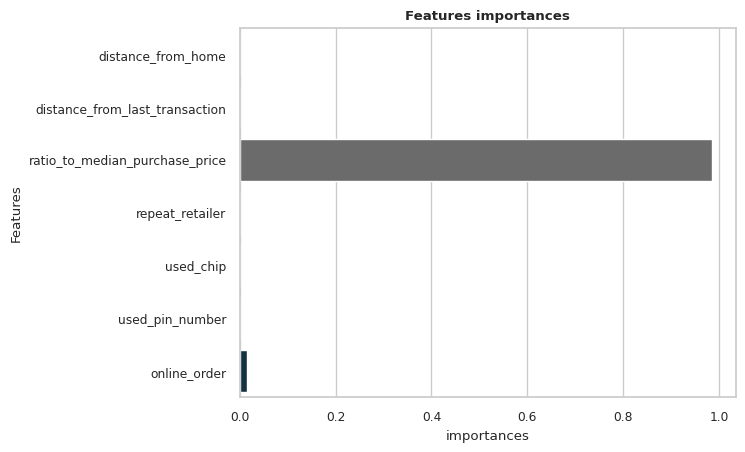

In [249]:
importances = model_tree.feature_importances_ 
columns = X.columns

sns.barplot(y = columns, x = importances, linewidth = 1, palette = colors)
plt.title("Features importances", fontweight='bold')
plt.xlabel("importances")
plt.ylabel("Features")
plt.show()

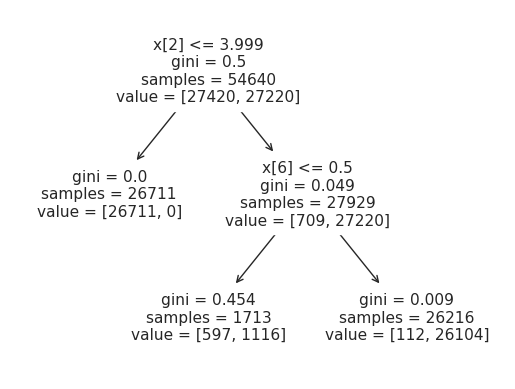

In [234]:
plot_tree(model_tree);

## Impact of maximum depth

We can easily check the effect of setting a maximum depth on the training, testing and validation data set: just train several models with maximum depths between 1 and 7, display the percentage of success in each case.

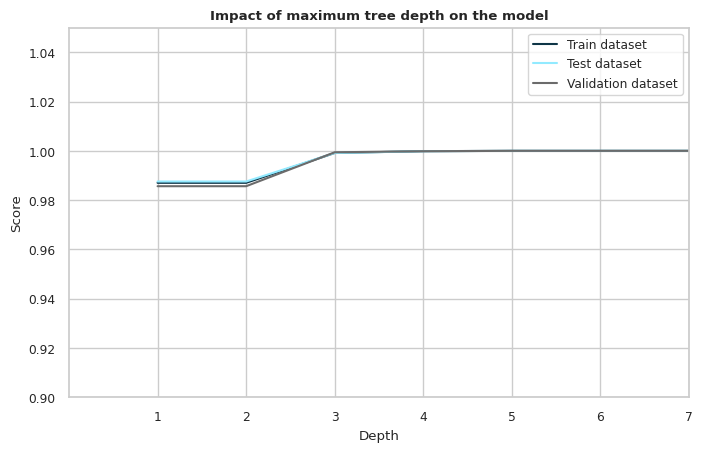

In [235]:
train_scores = [] 
test_scores = [] 
validation_scores = []
for depth in range(1, 8): 
    model = DecisionTreeClassifier(max_depth = depth) 
    model.fit(X_train, y_train) 
    train_scores.append(model.score(X_train, y_train)) 
    test_scores.append(model.score(X_test, y_test)) 
    validation_scores.append(model.score(X_validation, y_validation))
    

#Visualicemos ahora el resultado: 
fig, ax = plt.subplots(figsize=(8, 4.8))

ax.plot(range(1, 8), train_scores, label="Train dataset", color=colors[0])
ax.plot(range(1, 8), test_scores, label="Test dataset", color=colors[1])
ax.plot(range(1, 8), validation_scores, label="Validation dataset", color=colors[2])

ax.set_xlabel("Depth")
ax.set_ylabel("Score")
plt.title("Impact of maximum tree depth on the model", fontweight='bold')
ax.set_xticks(range(1, 8), labels=range(1, 8))
ax.grid(zorder=0.5)
ax.set_ylim(0.9, 1.05)
ax.set_xlim(0, 7)
ax.legend()
plt.show()

When the model exceeds the depth of 2 nodes, it tends to overfit.

___
## Predictive model - Random Forest 🌳🌲🌳🌲

#### Create and train the model

In [251]:
random_forest = RandomForestClassifier(n_estimators=10, random_state =0, max_depth = 2)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=10, random_state=0)

#### Model evaluation
Calculation of predictions in Train and Test

In [252]:
# Predictions
y_train_pred_f = random_forest.predict(X_train)
y_test_pred_f = random_forest.predict(X_test)
y_validation_pred_f = random_forest.predict(X_validation)

# Accuracy predictions
train_accuracy = accuracy_score(y_train, y_train_pred_f)
test_accuracy = accuracy_score(y_test, y_test_pred_f)
validation_accuracy = accuracy_score(y_validation, y_validation_pred_f)

print("The accuracy in Train:", train_accuracy)
print("The accuracy in Test:", test_accuracy)
print("The accuracy in Validation:", validation_accuracy)

The accuracy in Train: 0.989586383601757
The accuracy in Test: 0.9897510980966325
The accuracy in Validation: 0.9887262079062957


#### Impact of maximum n_estimators on the model

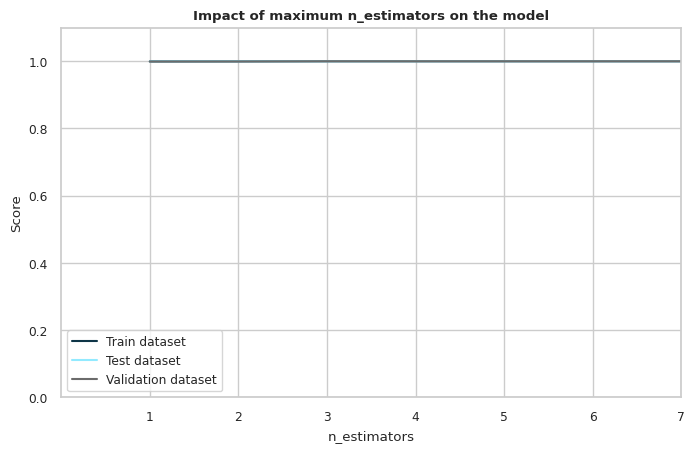

In [238]:
train_scores = [] 
test_scores = [] 
validation_scores = []

for i in range(1,8):
  random_forest_t = RandomForestClassifier(n_estimators=i, random_state =0)
  random_forest_t.fit(X_train, y_train)

  # Cálculo de las predicciones en Tran y Test
  train_scores.append(random_forest_t.score(X_train, y_train)) 
  test_scores.append(random_forest_t.score(X_test, y_test)) 
  validation_scores.append(random_forest_t.score(X_validation, y_validation))
    

#Visualicemos ahora el resultado: 
fig, ax = plt.subplots(figsize=(8, 4.8))

ax.plot(range(1, 8), train_scores, label="Train dataset", color=colors[0])
ax.plot(range(1, 8), test_scores, label="Test dataset", color=colors[1])
ax.plot(range(1, 8), validation_scores, label="Validation dataset", color=colors[2])

ax.set_xlabel("n_estimators")
ax.set_ylabel("Score")
plt.title("Impact of maximum n_estimators on the model", fontweight='bold')
ax.set_xticks(range(1, 8), labels=range(1, 8))
ax.grid(zorder=0.5)
ax.set_ylim(0, 1.1)
ax.set_xlim(0, 7)
ax.legend()
plt.show()

The accuracy of the model is almost perfect with the minimum number of n_estimators and becomes perfect from 3 onwards.

___
## Demonstration of model classification
Creation of a record taking random values from the scaled data frame to make the prediction and subsequently reconvert to the original scale

In [239]:
# Random values
value_distance_from_home =  X_resampled["distance_from_home"].sample(1).values
value_distance_from_last_transaction = X_resampled["distance_from_last_transaction"].sample(1).values
value_ratio_to_median_purchase_price = X_resampled["ratio_to_median_purchase_price"].sample(1).values
value_repeat_retailer = X_resampled["repeat_retailer"].sample(1).values
value_used_chip = X_resampled["used_chip"].sample(1).values
value_used_pin_number = X_resampled["used_pin_number"].sample(1).values
value_online_order = X_resampled["online_order"].sample(1).values


The prediction of the random forest model is non-fraud

In [240]:
random_values_columns = pd.array(data=[value_distance_from_home, value_distance_from_last_transaction, value_ratio_to_median_purchase_price,
                                       value_repeat_retailer, value_used_chip, value_used_pin_number, value_online_order], dtype="float")

predict_random_values = random_forest.predict(random_values_columns.reshape(1,7))
print(predict_random_values)

[1.]


/home/williamccs/miniconda3/envs/cookiecutter-personal/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [241]:
probability = random_forest.predict_proba(random_values_columns.reshape(1,7))
print("Probability of credit card fraud in this record is:", probability[0, 1]*100, "%")

Probability of credit card fraud in this record is: 100.0 %


/home/williamccs/miniconda3/envs/cookiecutter-personal/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Reverse data transformation

In [242]:
random_values_2d = random_values_columns.reshape(1,7)[0, :3].reshape(1, -1)

inverse_random_values = scaler.inverse_transform(random_values_2d).reshape(3)
print(inverse_random_values)

[313.19720121   2.87600727   7.03770938]


In [243]:
random_values_columns = random_values_columns[-4:].reshape(4)
print(random_values_columns)

<PandasArray>
[1.0, 0.0, 0.0, 1.0]
Length: 4, dtype: float64


In [244]:
concatenated_array = np.concatenate([inverse_random_values, random_values_columns], axis=0)
print(concatenated_array)

[313.19720121   2.87600727   7.03770938   1.           0.
   0.           1.        ]


In [245]:
df_random_values_columns = pd.DataFrame(data = concatenated_array.reshape(1,7), columns=X.columns)
df_random_values_columns

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,313.197201,2.876007,7.037709,1.0,0.0,0.0,1.0


**Random value summary and prediction**

In [248]:
print("The distance since the last transaction made:", df_random_values_columns.iloc[:, 0].values) 
print("The relationship between the transaction purchase price and the average purchase price:", df_random_values_columns.iloc[:, 1].values)
print("The transaction took place at the same retailer:", df_random_values_columns.iloc[:, 2].values)
print("It is the transaction through chip (credit card):", bool(df_random_values_columns.iloc[:, 3].values))
print("The transaction was carried out using the PIN number:", bool(df_random_values_columns.iloc[:, 4].values))
print("Is the transaction an online order:", bool(df_random_values_columns.iloc[:, 5].values), "\n")

print("Fraud: Is the transaction fraudulent?:", bool(df_random_values_columns.iloc[:, 6].values))

The distance since the last transaction made: [313.19720121]
The relationship between the transaction purchase price and the average purchase price: [2.87600727]
The transaction took place at the same retailer: [7.03770938]
It is the transaction through chip (credit card): True
The transaction was carried out using the PIN number: False
Is the transaction an online order: False 

Fraud: Is the transaction fraudulent?: True


___
#### *Conclutions*
- One of the weaknesses of decision trees and random forests is that bias is generated when there are dominant classes. To do this, the outliers of the biased variables were eliminated using the interquartile range and increasing the factor.
- By reducing the bias of the variables and balancing the predictive class, better accuracy was obtained in the models
- By knowing in advance that one of the weaknesses of the decision trees is overtraining, it was possible to confirm that with a depth of maximum 2 nodes the model behaves appropriately, avoiding overtraining
- The random forest model has a greater accuracy than that of decision trees, almost tending towards the perfection of predictions